In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/Users/mdnaif/Desktop/Winter_Arc_ML/Day03_Decision_Trees/heart_cleveland_upload.csv")

In [7]:
print("Size : ",df.size)
print("Shape : ",df.shape)

Size :  4158
Shape :  (297, 14)


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


### EDA

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

There are 13 attributes

*age* : age in years

*sex* : sex (1 = male; 0 = female)

*cp* : chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

*trestbps* : resting blood pressure (in mm Hg on admission to the hospital)

*chol* : serum cholestoral in mg/dl

*fbs* : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

*restecg* : resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*thalach* : maximum heart rate achieved

*exang* : exercise induced angina (1 = yes; 0 = no)

*oldpeak* = ST depression induced by exercise relative to rest

*slope* : the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

*ca* : number of major vessels (0-3) colored by flourosopy

*thal* : 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

*condition* : 0 = no disease, 1 = disease


In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

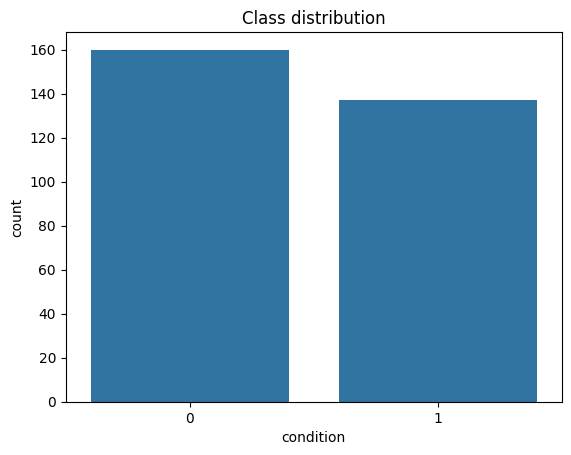

In [16]:
sns.countplot(x= df["condition"],data = df)
plt.title("Class distribution")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

cat_coln = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
num_coln =["age","trestbps","chol","thalach","oldpeak"]

X = df[cat_coln + num_coln]
y = df["condition"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

preprocessing = ColumnTransformer([
    ("cat_col",OneHotEncoder(handle_unknown="ignore"),cat_coln),
    ("num_col","passthrough",num_coln)
])

pipeline = make_pipeline(
    (preprocessing),
    (DecisionTreeClassifier(random_state=42))
)

In [19]:
pipeline.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat_col',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                   'slope', 'ca', 'thal']),
                                 ('num_col', 'passthrough',
                                  ['age', 'trestbps', 'chol', 'thalach',
                                   'oldpeak'])]),
 'decisiontreeclassifier': DecisionTreeClassifier(random_state=42)}

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decisiontreeclassifier__max_depth" : [3,4,5,6,7,8],
    "decisiontreeclassifier__min_samples_leaf" : [5,10,15,20],
    "decisiontreeclassifier__class_weight" : ["balanced",None], 
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train,y_train)

best_model = grid.best_estimator_
print(grid.best_params_)

{'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 5}


In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = best_model.predict(X_test)

print(f"Acccuracy : \n{accuracy_score(y_test,y_pred)}\n")
print(f"Confusion_matrix : \n{confusion_matrix(y_test,y_pred)}\n")
print(f"Classification_report : \n{classification_report(y_test,y_pred)}\n")

Acccuracy : 
0.8

Confusion_matrix : 
[[25  7]
 [ 5 23]]

Classification_report : 
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.82      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60




### Feature Importance

In [22]:
tree = best_model.named_steps["decisiontreeclassifier"]

feature_names = (
    best_model.named_steps["columntransformer"].get_feature_names_out()
)

importance = tree.feature_importances_

feat_imp = pd.DataFrame({
    "Feature" : feature_names,
    "Importance" : importance
}).sort_values(by="Importance",ascending=False)

print(feat_imp.head(10))

             Feature  Importance
5      cat_col__cp_3    0.501006
27  num_col__oldpeak    0.191611
16     cat_col__ca_0    0.101106
23      num_col__age    0.086011
14  cat_col__slope_1    0.052532
26  num_col__thalach    0.048532
22   cat_col__thal_2    0.019201
4      cat_col__cp_2    0.000000
17     cat_col__ca_1    0.000000
25     num_col__chol    0.000000


In [23]:
sum(importance)

np.float64(0.9999999999999998)

### Tree Visualisation

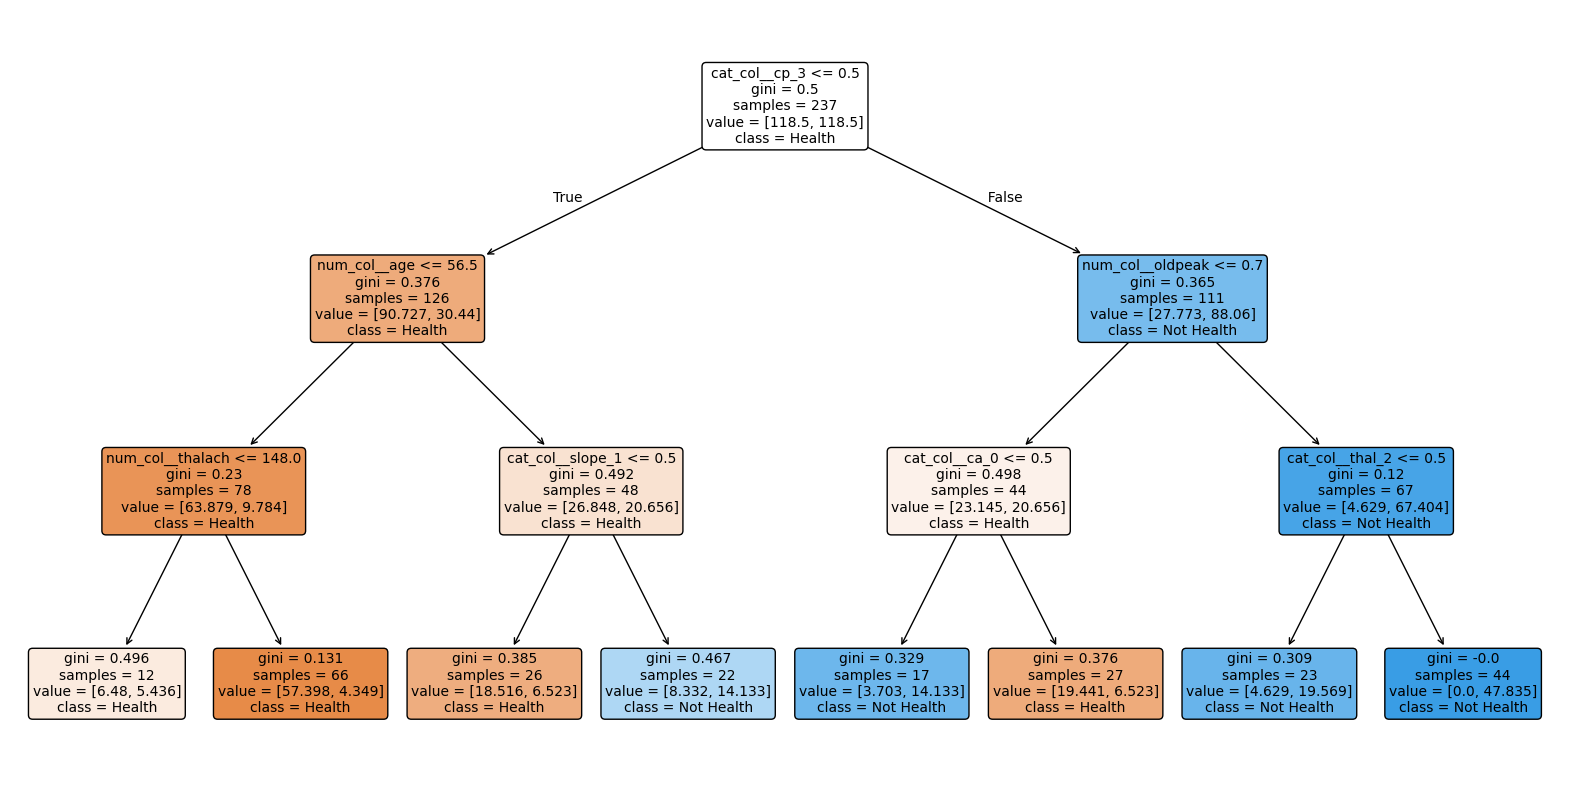

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=["Health", "Not Health"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

### Saving the Model

In [25]:
import pickle

with open("heart_disease_model.pkl","wb") as f:
    pickle.dump(best_model,f)
    print("Model saved to heart_disease_model.pkl")

Model saved to heart_disease_model.pkl
